Setup

In [13]:
from sklearn.covariance import EllipticEnvelope
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import OneClassSVM

estimators = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.0, contamination=0.25),
    "Robust Covariance (Minimum Covariance Determinant)": EllipticEnvelope(
        contamination=0.25
    ),
    "OCSVM": OneClassSVM(nu=0.25, gamma=0.35),
}



Get Data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine


df = pd.read_csv('../Dataset/star_classification.csv')
X = df[['u','g']].to_numpy()  
print(X)

[[23.87882 22.2753 ]
 [24.77759 22.83188]
 [25.26307 22.66389]
 ...
 [21.16916 19.26997]
 [25.35039 21.63757]
 [22.62171 21.79745]]


First, do statistical approaches.

In [21]:
df = df.drop(columns=['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID'])
print(df.describe())
print(df['class'])

               alpha          delta              u              g  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean      177.629117      24.135305      21.980468      20.531387   
std        96.502241      19.644665      31.769291      31.750292   
min         0.005528     -18.785328   -9999.000000   -9999.000000   
25%       127.518222       5.146771      20.352353      18.965230   
50%       180.900700      23.645922      22.179135      21.099835   
75%       233.895005      39.901550      23.687440      22.123767   
max       359.999810      83.000519      32.781390      31.602240   

                   r              i              z       redshift  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean       19.645762      19.084854      18.668810       0.576661  
std         1.854760       1.757895      31.728152       0.730707  
min         9.822070       9.469903   -9999.000000      -0.009971  
25%        18.135828      17.732285   

In [22]:
std = df.alpha.std()
mean = df.alpha.mean()
df = df.drop(df[(df.alpha.le(mean-3*std)) | (df.alpha.ge(mean+3*std))].index)

std = df.delta.std()
mean = df.delta.mean()
df = df.drop(df[(df.delta.le(mean-3*std)) | (df.delta.ge(mean+3*std))].index)

std = df.u.std()
mean = df.u.mean()
df = df.drop(df[(df.u.le(mean-3*std)) | (df.u.ge(mean+3*std))].index)

std = df.g.std()
mean = df.g.mean()
df = df.drop(df[(df.g.le(mean-3*std)) | (df.g.ge(mean+3*std))].index)

std = df.r.std()
mean = df.r.mean()
df = df.drop(df[(df.r.le(mean-3*std)) | (df.r.ge(mean+3*std))].index)

std = df.i.std()
mean = df.i.mean()
df = df.drop(df[(df.i.le(mean-3*std)) | (df.i.ge(mean+3*std))].index)

std = df.z.std()
mean = df.z.mean()
df = df.drop(df[(df.z.le(mean-3*std)) | (df.z.ge(mean+3*std))].index)

std = df.redshift.std()
mean = df.redshift.mean()
df = df.drop(df[(df.redshift.le(mean-3*std)) | (df.redshift.ge(mean+3*std))].index)

print(df.describe())

              alpha         delta             u             g             r  \
count  97814.000000  97814.000000  97814.000000  97814.000000  97814.000000   
mean     177.599567     24.150785     22.071659     20.630475     19.636028   
std       96.535545     19.654619      2.239830      2.023809      1.834898   
min        0.005528    -18.785328     14.311050     14.520380     14.168760   
25%      127.478240      5.144758     20.332845     18.938333     18.100860   
50%      180.868223     23.685853     22.157445     21.092910     20.105900   
75%      233.890810     39.908920     23.670853     22.131880     21.031697   
max      359.999810     83.000519     29.234380     26.714980     25.121300   

                  i             z      redshift  
count  97814.000000  97814.000000  97814.000000  
mean      19.065337     18.747675      0.521963  
std        1.728697      1.737013      0.595197  
min       13.899870     13.559570     -0.009971  
25%       17.699045     17.430633     

In [23]:
df.to_csv('preprocessed_data.csv')

Trying the detection methods.

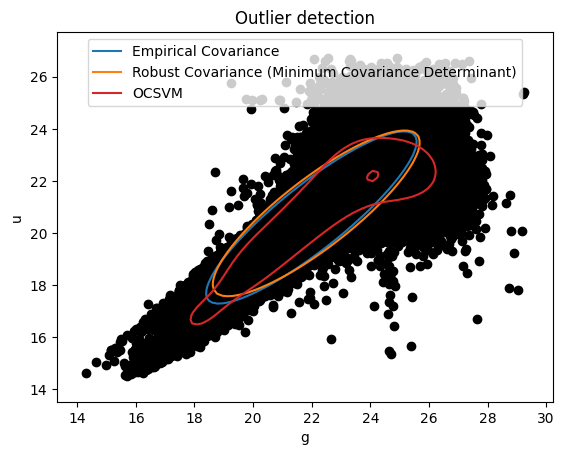

In [8]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
 # two clusters

X = df[['u','g']].to_numpy()  

fig, ax = plt.subplots()
colors = ["tab:blue", "tab:orange", "tab:red"]
# Learn a frontier for outlier detection with several classifiers
legend_lines = []
for color, (name, estimator) in zip(colors, estimators.items()):
    estimator.fit(X)
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method="decision_function",
        plot_method="contour",
        levels=[0],
        colors=color,
        ax=ax,
    )
    legend_lines.append(mlines.Line2D([], [], color=color, label=name))


ax.scatter(X[:, 0], X[:, 1], color="black")


ax.legend(handles=legend_lines, loc="upper center")
_ = ax.set(
    xlabel="g",
    ylabel="u",
    title="Outlier detection",
)

Local Outlier Factor

In [9]:
print(X)

[[23.87882 22.2753 ]
 [24.77759 22.83188]
 [25.26307 22.66389]
 ...
 [21.16916 19.26997]
 [25.35039 21.63757]
 [22.62171 21.79745]]


In [10]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
X_scores = clf.negative_outlier_factor_

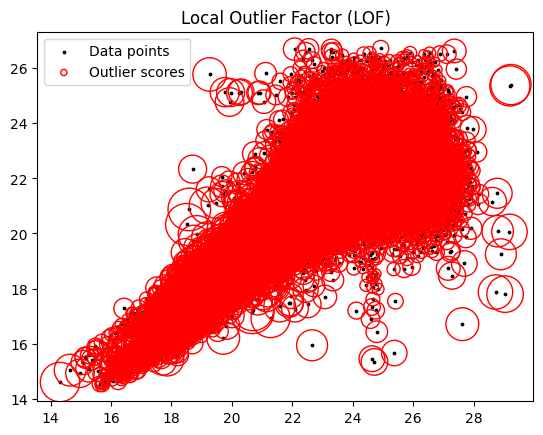

In [11]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection


def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])


plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()